In [2]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(0, '../')

In [3]:
from src.utils.init_utils import seed_all, set_gpu_device, load_dataset
seed_all()
gpu_number=1
device, run_on_gpu = set_gpu_device(gpu_number)

Global seed set to 5


Number of cuda devices: 0
My device: cpu


## Whether good parameters of a subject group will be good for another group

In [17]:
from src.basic.subject_group import SubjectGroup

train_1 = SubjectGroup('train', 1)
train_2 = SubjectGroup('train', 2)
train_3 = SubjectGroup('train', 3)
train_4 = SubjectGroup('train', 4)
train_5 = SubjectGroup('train', 5)
validation_1 = SubjectGroup('validation', 1)
validation_5 = SubjectGroup('validation', 5)
validation_10 = SubjectGroup('validation', 10)
test_1 = SubjectGroup('test', 1)
test_5 = SubjectGroup('test', 5)
test_10 = SubjectGroup('test', 10)

SC loaded for train 1!
10000 params loaded for train 1!
SC loaded for train 2!
10000 params loaded for train 2!
SC loaded for train 3!
10000 params loaded for train 3!
SC loaded for train 4!
10000 params loaded for train 4!
SC loaded for train 5!
10000 params loaded for train 5!
SC loaded for validation 1!
10000 params loaded for validation 1!
SC loaded for validation 5!
10000 params loaded for validation 5!
SC loaded for validation 10!
10000 params loaded for validation 10!
SC loaded for test 1!
10000 params loaded for test 1!
SC loaded for test 5!
10000 params loaded for test 5!
SC loaded for test 10!
10000 params loaded for test 10!


In [4]:
from src.utils.SC_utils import corr_between_SCs
corr_between_SCs([train_1.SC, validation_1.SC])

array([[1.        , 0.99674865],
       [0.99674865, 1.        ]])

In [11]:
p1 = train_1.param_performances[0]
p2 = train_1.param_performances[1]
res = torch.stack((p1.performance, p2.performance), dim=0)
res = res.transpose(0, 1)
print(res)

tensor([[10., 10.],
        [ 5.,  5.],
        [10., 10.],
        [25., 25.]], dtype=torch.float32)


In [4]:
from assumption_validation import test_swap_param
path_to_train_group = '/home/ftian/storage/pMFM_speedup/dataset_generation/input_to_pMFM/train/1/'

In [ ]:
saved_tensor_0 = test_swap_param(validation_1, train_1, path_to_train_group, num_param_to_swap=10, file_name='swap_params/test.csv')

In [ ]:
saved_tensor_1 = test_swap_param(validation_1, train_1, path_to_train_group, num_param_to_swap=1000, file_name='swap_params/use_val_1_param_on_train_1_SC.csv')

In [ ]:
saved_tensor_2 = test_swap_param(test_1, train_1, path_to_train_group, num_param_to_swap=1000, file_name='swap_params/use_test_1_param_on_train_1_SC.csv')

In [ ]:
saved_tensor_3 = test_swap_param(train_2, train_1, path_to_train_group, num_param_to_swap=1000, file_name='swap_params/use_train_2_param_on_train_1_SC.csv')

In [ ]:
saved_tensor_4 = test_swap_param(train_3, train_1, path_to_train_group, num_param_to_swap=1000, file_name='swap_params/use_train_3_param_on_train_1_SC.csv')

In [ ]:
saved_tensor_5 = test_swap_param(train_4, train_1, path_to_train_group, num_param_to_swap=1000, file_name='swap_params/use_train_4_param_on_train_1_SC.csv')

In [ ]:

saved_tensor_6 = test_swap_param(train_5, train_1, path_to_train_group, num_param_to_swap=1000, file_name='swap_params/use_train_5_param_on_train_1_SC.csv')

### Results

correlation between two SCs: 0.9967486503891699
5000 parameters have been swapped
105 parameters with new SC does not have meaningful time course while the original one has
4 parameters with the original SC does not have meaningful time course while the new one has
2162 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


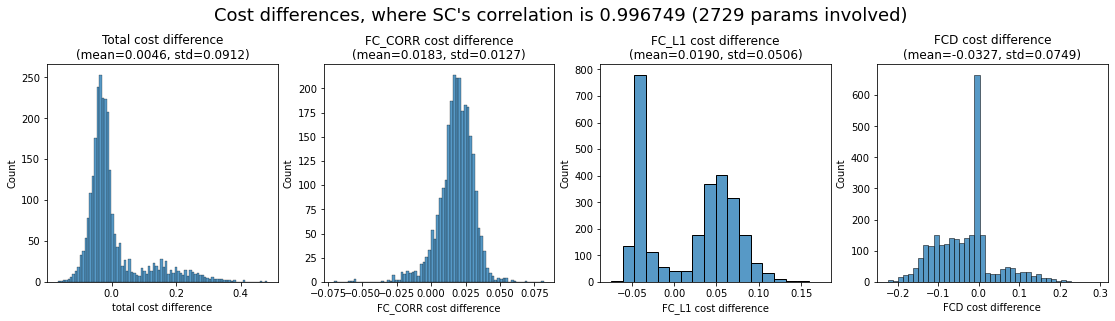

In [6]:
from assumption_validation import check_swap_param_effect
check_swap_param_effect("swap_params/use_validation_1_param_on_train_1_SC.csv")

correlation between two SCs: 0.9972700740322883
5000 parameters have been swapped
57 parameters with new SC does not have meaningful time course while the original one has
29 parameters with the original SC does not have meaningful time course while the new one has
994 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


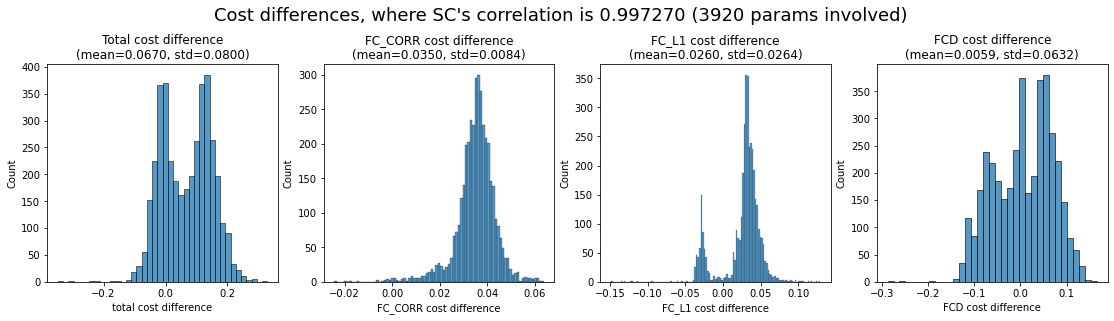

In [7]:
check_swap_param_effect("swap_params/use_test_1_param_on_train_1_SC.csv")

correlation between two SCs: 0.9992206201399028
5000 parameters have been swapped
4 parameters with new SC does not have meaningful time course while the original one has
45 parameters with the original SC does not have meaningful time course while the new one has
2655 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


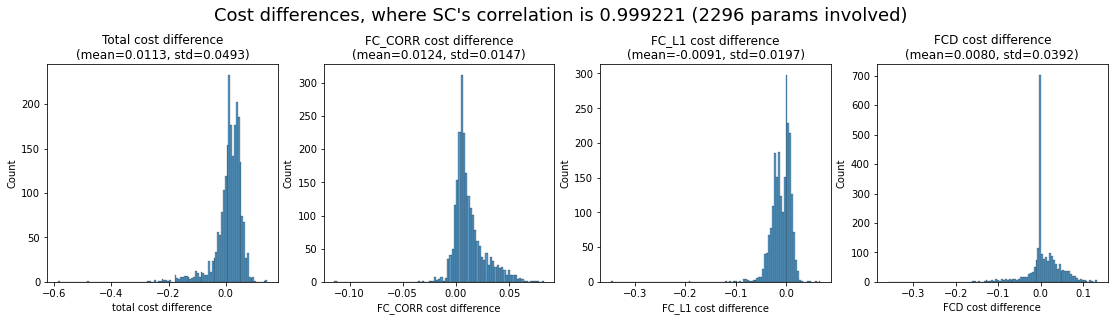

In [8]:
check_swap_param_effect("swap_params/use_train_2_param_on_train_1_SC.csv")

correlation between two SCs: 0.9987694282753302
5000 parameters have been swapped
13 parameters with new SC does not have meaningful time course while the original one has
41 parameters with the original SC does not have meaningful time course while the new one has
2327 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


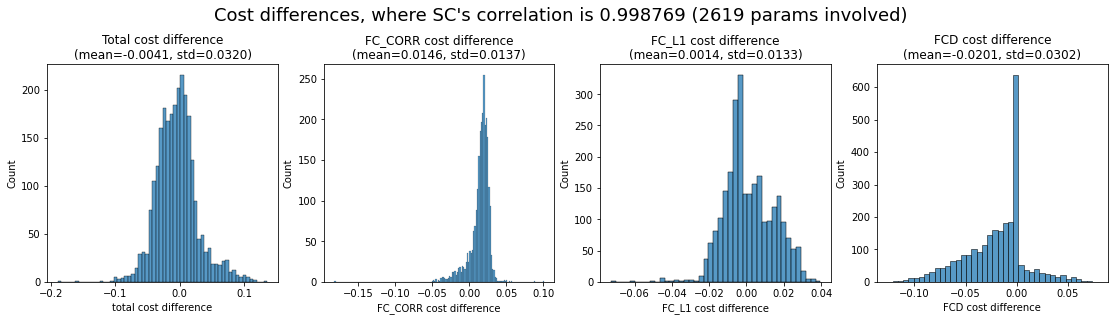

In [9]:
check_swap_param_effect("swap_params/use_train_3_param_on_train_1_SC.csv")

correlation between two SCs: 0.9981739700997108
5000 parameters have been swapped
13 parameters with new SC does not have meaningful time course while the original one has
16 parameters with the original SC does not have meaningful time course while the new one has
2394 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


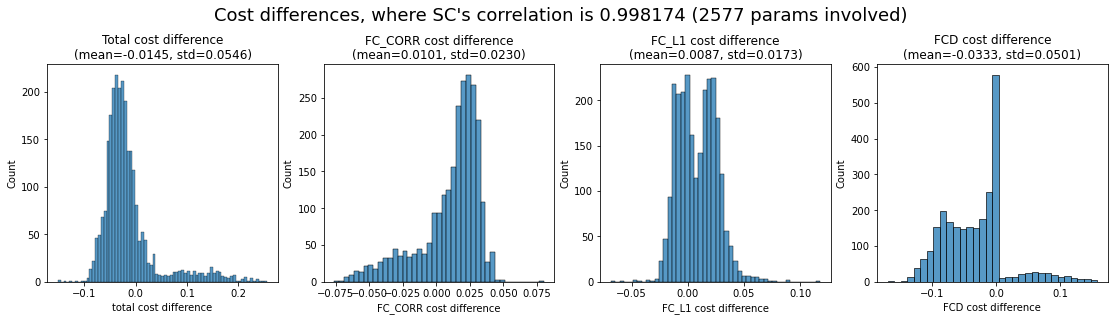

In [10]:
check_swap_param_effect("swap_params/use_train_4_param_on_train_1_SC.csv")

correlation between two SCs: 0.9974477728429507
5000 parameters have been swapped
23 parameters with new SC does not have meaningful time course while the original one has
5 parameters with the original SC does not have meaningful time course while the new one has
1997 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


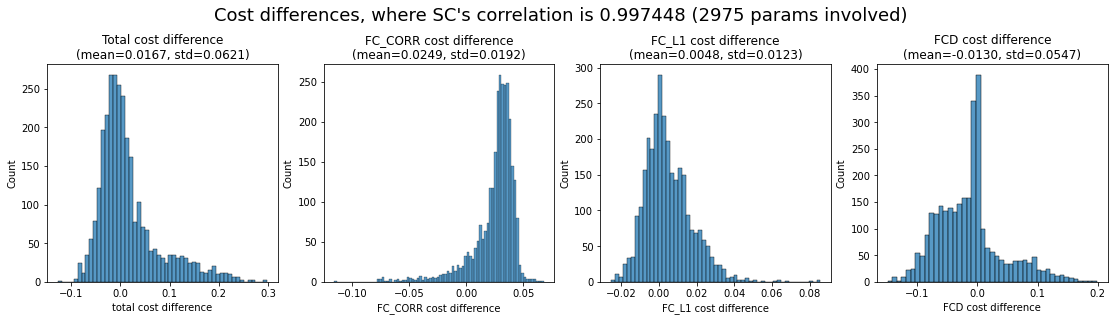

In [11]:
check_swap_param_effect("swap_params/use_train_5_param_on_train_1_SC.csv")

correlation between two SCs: 0.9962362592678867
5000 parameters have been swapped
12 parameters with new SC does not have meaningful time course while the original one has
58 parameters with the original SC does not have meaningful time course while the new one has
576 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


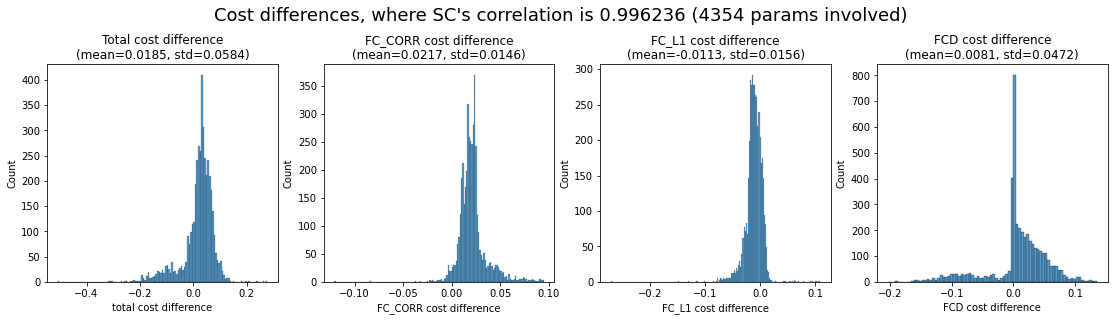

In [12]:
check_swap_param_effect("swap_params/use_validation_5_param_on_train_1_SC.csv")

correlation between two SCs: 0.9970797226122352
5000 parameters have been swapped
104 parameters with new SC does not have meaningful time course while the original one has
5 parameters with the original SC does not have meaningful time course while the new one has
2328 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


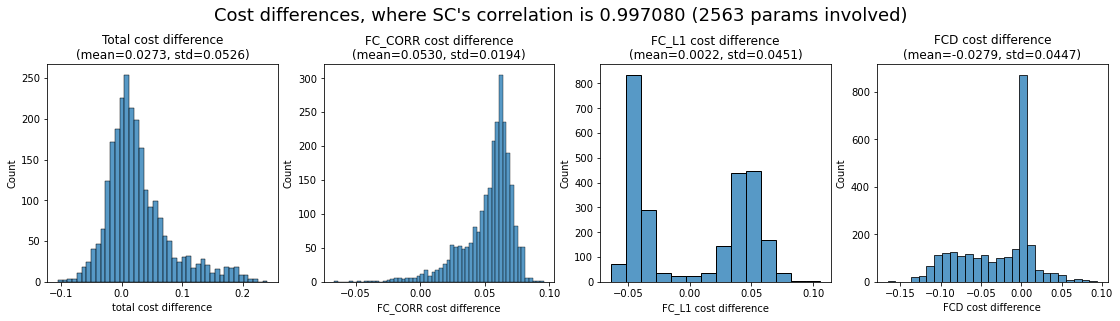

In [13]:
check_swap_param_effect("swap_params/use_validation_10_param_on_train_1_SC.csv")

correlation between two SCs: 0.9970367247643842
5000 parameters have been swapped
55 parameters with new SC does not have meaningful time course while the original one has
5 parameters with the original SC does not have meaningful time course while the new one has
1909 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


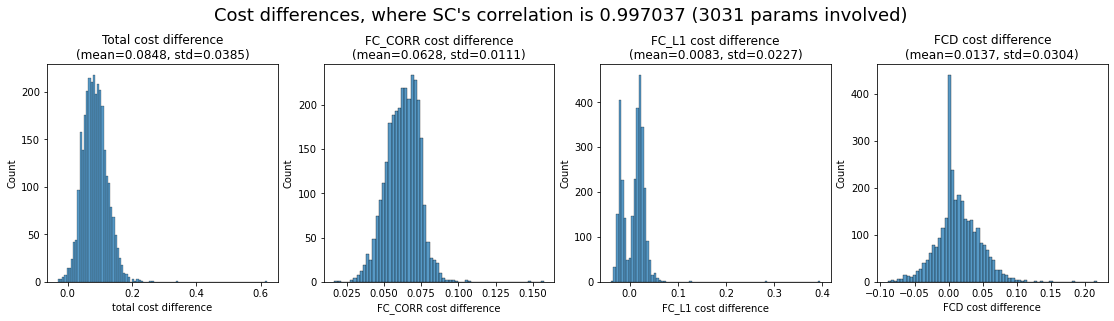

In [14]:
check_swap_param_effect("swap_params/use_test_5_param_on_train_1_SC.csv")

correlation between two SCs: 0.9964964402090144
5000 parameters have been swapped
38 parameters with new SC does not have meaningful time course while the original one has
14 parameters with the original SC does not have meaningful time course while the new one has
1899 parameters with identical performance after swapping (most likely due to no meaningful time course being generated in either case)


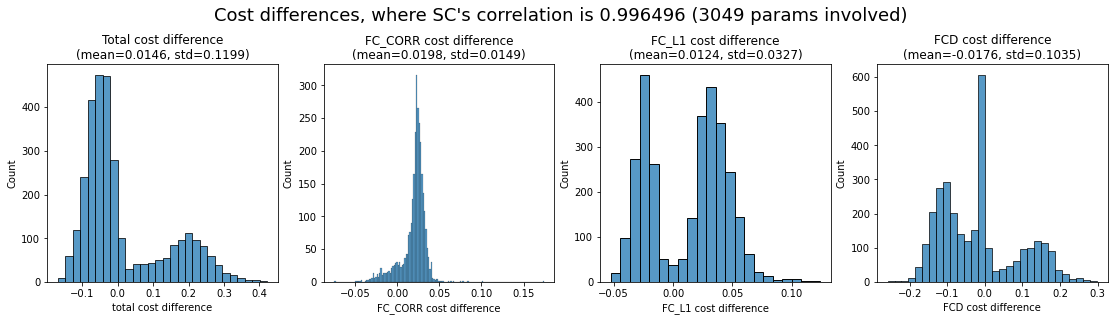

In [15]:
check_swap_param_effect("swap_params/use_test_10_param_on_train_1_SC.csv")

## Check costs of all GOOD params

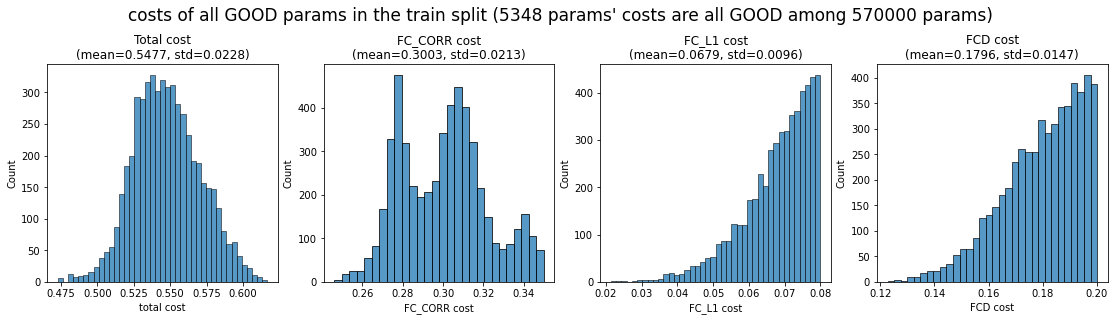

In [4]:
from src.utils.test_utils import check_all_good_params_costs
check_all_good_params_costs('train')

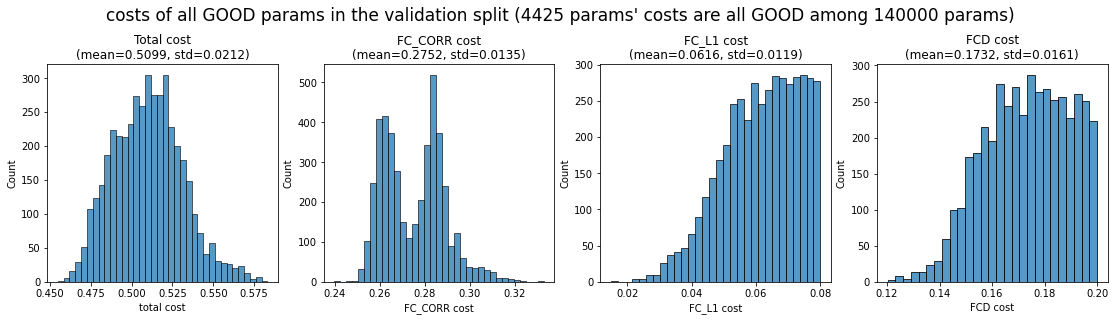

In [4]:
check_all_good_params_costs('validation')

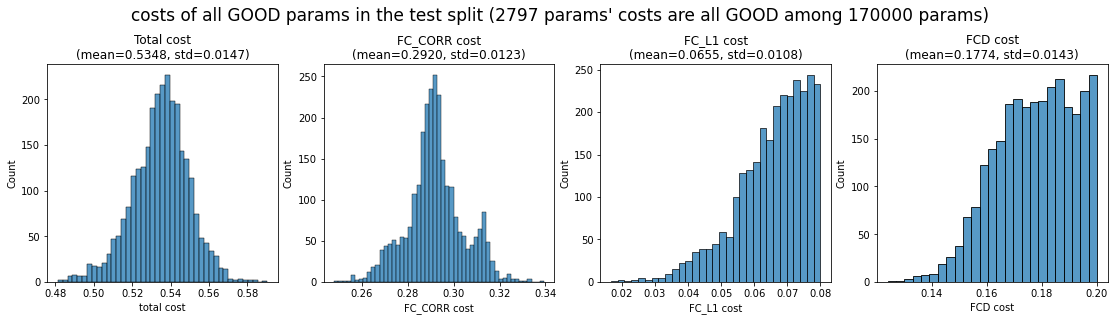

In [5]:
check_all_good_params_costs('test')

## How many parameters with good FCD_KS will also have great FC_CORR and FC_L1

In [22]:
from src.basic.subject_group import SubjectGroup
train_1 = SubjectGroup('train', 1)
train_11 = SubjectGroup('train', 11)
train_21 = SubjectGroup('train', 21)
train_31 = SubjectGroup('train', 31)
train_41 = SubjectGroup('train', 41)
train_51 = SubjectGroup('train', 51)
validation_1 = SubjectGroup('validation', 1)
validation_5 = SubjectGroup('validation', 5)
validation_10 = SubjectGroup('validation', 10)
test_1 = SubjectGroup('test', 1)
test_5 = SubjectGroup('test', 5)
test_10 = SubjectGroup('test', 10)
test_15 = SubjectGroup('test', 15)

SC loaded for train 1!
10000 params loaded for train 1!
SC loaded for train 11!
10000 params loaded for train 11!
SC loaded for train 21!
10000 params loaded for train 21!
SC loaded for train 31!
10000 params loaded for train 31!
SC loaded for train 41!
10000 params loaded for train 41!
SC loaded for train 51!
10000 params loaded for train 51!
SC loaded for validation 1!
10000 params loaded for validation 1!
SC loaded for validation 5!
10000 params loaded for validation 5!
SC loaded for validation 10!
10000 params loaded for validation 10!
SC loaded for test 1!
10000 params loaded for test 1!
SC loaded for test 5!
10000 params loaded for test 5!
SC loaded for test 10!
10000 params loaded for test 10!
SC loaded for test 15!
10000 params loaded for test 15!


In [25]:
train_1.label_summary()

train 1: 5052 params with GOOD FC_CORR, 2923 params with GOOD FC_L1, 1737 params with GOOD FCD_KS, 551 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.1091, FC_L1: 0.1885, FCD_KS: 0.3172


In [26]:
train_11.label_summary()

train 11: 5802 params with GOOD FC_CORR, 3159 params with GOOD FC_L1, 1500 params with GOOD FCD_KS, 895 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.1543, FC_L1: 0.2833, FCD_KS: 0.5967


In [27]:
train_21.label_summary()

train 21: 5516 params with GOOD FC_CORR, 1830 params with GOOD FC_L1, 1638 params with GOOD FCD_KS, 0 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0000, FC_L1: 0.0000, FCD_KS: 0.0000


In [28]:
train_31.label_summary()

train 31: 6872 params with GOOD FC_CORR, 2827 params with GOOD FC_L1, 1893 params with GOOD FCD_KS, 253 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0368, FC_L1: 0.0895, FCD_KS: 0.1337


In [29]:
train_41.label_summary()

train 41: 3043 params with GOOD FC_CORR, 974 params with GOOD FC_L1, 1121 params with GOOD FCD_KS, 0 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0000, FC_L1: 0.0000, FCD_KS: 0.0000


In [30]:
train_51.label_summary()

train 51: 3956 params with GOOD FC_CORR, 2078 params with GOOD FC_L1, 811 params with GOOD FCD_KS, 106 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0268, FC_L1: 0.0510, FCD_KS: 0.1307


In [31]:
validation_1.label_summary()

validation 1: 4993 params with GOOD FC_CORR, 2056 params with GOOD FC_L1, 737 params with GOOD FCD_KS, 17 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0034, FC_L1: 0.0083, FCD_KS: 0.0231


In [32]:
validation_5.label_summary()

validation 5: 6862 params with GOOD FC_CORR, 3316 params with GOOD FC_L1, 1064 params with GOOD FCD_KS, 99 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0144, FC_L1: 0.0299, FCD_KS: 0.0930


In [33]:
validation_10.label_summary()

validation 10: 4183 params with GOOD FC_CORR, 1787 params with GOOD FC_L1, 891 params with GOOD FCD_KS, 3 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0007, FC_L1: 0.0017, FCD_KS: 0.0034


In [34]:
test_1.label_summary()

test 1: 7542 params with GOOD FC_CORR, 3792 params with GOOD FC_L1, 3351 params with GOOD FCD_KS, 1632 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.2164, FC_L1: 0.4304, FCD_KS: 0.4870


In [35]:
test_5.label_summary()

test 5: 5752 params with GOOD FC_CORR, 2752 params with GOOD FC_L1, 811 params with GOOD FCD_KS, 156 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0271, FC_L1: 0.0567, FCD_KS: 0.1924


In [36]:
test_10.label_summary()

test 10: 5188 params with GOOD FC_CORR, 2591 params with GOOD FC_L1, 1066 params with GOOD FCD_KS, 85 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0164, FC_L1: 0.0328, FCD_KS: 0.0797


In [37]:
test_15.label_summary()

test 15: 5223 params with GOOD FC_CORR, 2350 params with GOOD FC_L1, 1056 params with GOOD FCD_KS, 116 params whose FC_CORR, FC_L1, FCD_KS are all good

Corresponding ratios of the "all GOOD" params in GOOD params for each cost type: FC_CORR: 0.0222, FC_L1: 0.0494, FCD_KS: 0.1098
